# Tribolium embryo morphometry II

Let's start by checking that pyclesperanto is installed and which GPU it uses.

In [1]:
import pyclesperanto_prototype as cle

cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

## Load a data set
The dataset is available [online](https://git.mpi-cbg.de/rhaase/clij2_example_data/blob/master/lund1051_resampled.tif).
It shows a *Tribolium castaneum* embryo, imaged by a custom light sheet microscope, at a wavelength of 488nm (Imaging credits: Daniela Vorkel, Myers lab, MPI CBG). 
The data set has been resampled to a voxel size of 1x1x1 microns. The embryo expresses nuclei-GFP. We will use the dataset to detect nuclei and to generate an estimated cell-segmentation.

All processing steps are performed in 3D space. For visualization purpose, we are using the maximum intensity projection in Z: 

In [2]:
from skimage.io import imread

# load data (download it from https://git.mpi-cbg.de/rhaase/clij2_example_data/-/blob/master/lund1051_resampled.tif
raw_image = imread('../napari_gui/lund1051_resampled.tif')

In [3]:
image = cle.asarray(raw_image)

cl.OCLArray([[[ 87.,  91.,  91., ...,  93.,  91.,  91.],
        [ 92.,  92.,  94., ...,  92.,  91.,  95.],
        [ 87.,  94.,  87., ...,  95.,  92.,  98.],
        ...,
        [ 86.,  84.,  82., ...,  88.,  96.,  94.],
        [ 81.,  82.,  84., ...,  90.,  89.,  92.],
        [ 83.,  79.,  85., ...,  88.,  92.,  92.]],

       [[131., 137., 136., ..., 139., 137., 136.],
        [138., 138., 141., ..., 138., 136., 141.],
        [130., 141., 130., ..., 142., 138., 147.],
        ...,
        [129., 127., 122., ..., 132., 144., 140.],
        [122., 123., 125., ..., 135., 133., 138.],
        [124., 118., 128., ..., 132., 138., 138.]],

       [[132., 135., 136., ..., 139., 138., 136.],
        [137., 136., 140., ..., 138., 138., 142.],
        [132., 137., 132., ..., 140., 137., 142.],
        ...,
        [130., 127., 123., ..., 135., 142., 138.],
        [124., 124., 125., ..., 134., 136., 138.],
        [126., 120., 127., ..., 135., 137., 138.]],

       ...,

       [[123., 124., 125., ..., 121., 119., 120.],
        [125., 124., 127., ..., 123., 120., 122.],
        [127., 122., 124., ..., 122., 122., 122.],
        ...,
        [113., 115., 113., ..., 123., 117., 119.],
        [114., 115., 116., ..., 122., 124., 123.],
        [114., 113., 114., ..., 120., 120., 119.]],

       [[123., 124., 124., ..., 122., 118., 122.],
        [122., 122., 126., ..., 125., 118., 121.],
        [128., 118., 127., ..., 120., 120., 120.],
        ...,
        [113., 114., 113., ..., 123., 115., 119.],
        [113., 115., 116., ..., 122., 123., 121.],
        [114., 114., 115., ..., 119., 118., 116.]],

       [[ 82.,  83.,  83., ...,  82.,  79.,  81.],
        [ 82.,  81.,  84., ...,  83.,  79.,  81.],
        [ 85.,  79.,  85., ...,  80.,  80.,  80.],
        ...,
        [ 76.,  76.,  75., ...,  82.,  77.,  79.],
        [ 75.,  77.,  78., ...,  81.,  82.,  81.],
        [ 76.,  76.,  77., ...,  80.,  79.,  78.]]], dtype=float32)
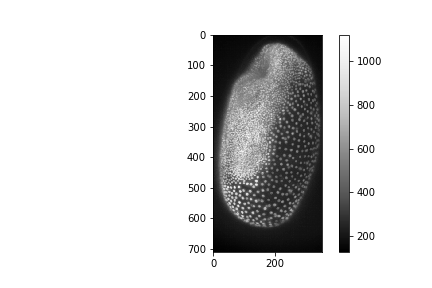
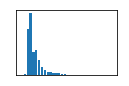

In [4]:
image

## Background subtraction

cl.OCLArray([[[ 2.,  6.,  6., ...,  5.,  3.,  3.],
        [ 7.,  7.,  9., ...,  3.,  2.,  6.],
        [ 2.,  9.,  2., ...,  6.,  3.,  9.],
        ...,
        [ 5.,  3.,  1., ...,  0.,  8.,  6.],
        [ 2.,  3.,  5., ...,  2.,  1.,  4.],
        [ 4.,  0.,  6., ...,  0.,  4.,  4.]],

       [[ 3.,  9.,  8., ...,  7.,  5.,  4.],
        [10., 10., 13., ...,  5.,  3.,  8.],
        [ 2., 13.,  2., ...,  9.,  5., 14.],
        ...,
        [ 8.,  6.,  1., ...,  0., 12.,  8.],
        [ 4.,  5.,  7., ...,  3.,  1.,  6.],
        [ 6.,  0., 10., ...,  0.,  6.,  6.]],

       [[ 4.,  7.,  8., ...,  6.,  5.,  3.],
        [ 7.,  6., 10., ...,  5.,  5.,  9.],
        [ 2.,  7.,  2., ...,  7.,  4.,  9.],
        ...,
        [ 9.,  6.,  2., ...,  1.,  8.,  4.],
        [ 4.,  4.,  5., ...,  1.,  3.,  5.],
        [ 6.,  0.,  7., ...,  2.,  4.,  5.]],

       ...,

       [[ 6.,  7.,  8., ...,  7.,  5.,  6.],
        [ 8.,  7., 10., ...,  9.,  6.,  8.],
        [10.,  5.,  7., ...,  8.,  8.,  8.],
        ...,
        [ 3.,  5.,  3., ...,  7.,  1.,  3.],
        [ 4.,  5.,  6., ...,  6.,  8.,  7.],
        [ 4.,  3.,  4., ...,  4.,  4.,  3.]],

       [[ 6.,  7.,  7., ...,  8.,  4.,  8.],
        [ 5.,  5.,  9., ..., 11.,  4.,  7.],
        [11.,  1., 10., ...,  6.,  6.,  6.],
        ...,
        [ 7.,  8.,  7., ...,  8.,  0.,  4.],
        [ 7.,  9., 10., ...,  7.,  8.,  6.],
        [ 8.,  8.,  9., ...,  6.,  5.,  3.]],

       [[ 4.,  5.,  5., ...,  5.,  2.,  4.],
        [ 4.,  3.,  6., ...,  6.,  2.,  4.],
        [ 7.,  1.,  7., ...,  3.,  3.,  3.],
        ...,
        [ 5.,  5.,  4., ...,  5.,  0.,  2.],
        [ 4.,  6.,  7., ...,  4.,  5.,  4.],
        [ 5.,  5.,  6., ...,  5.,  4.,  3.]]], dtype=float32)
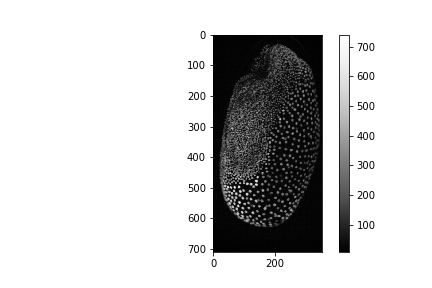
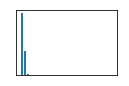

In [5]:
background_subtracted = cle.top_hat_box(image, radius_x=5, radius_y=5)
background_subtracted

## Voronoi-Otsu-Labeling

cl.OCLArray([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)
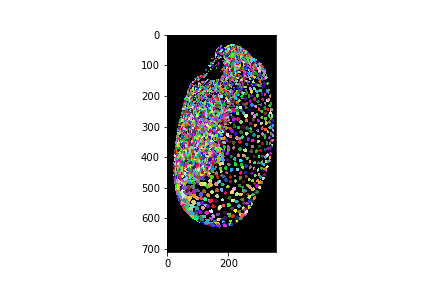

In [6]:
labels = cle.voronoi_otsu_labeling(background_subtracted, spot_sigma=1)
labels

cl.OCLArray([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)
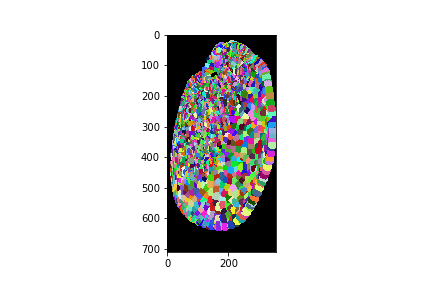

In [7]:
expanded_labels = cle.dilate_labels(labels, radius=10)
expanded_labels

## Draw connectivity of the cells as a mesh
We then read out all current positions of detected nuclei as a pointlist to generate 
a distance matrix of all nuclei towards each other:

cl.OCLArray([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
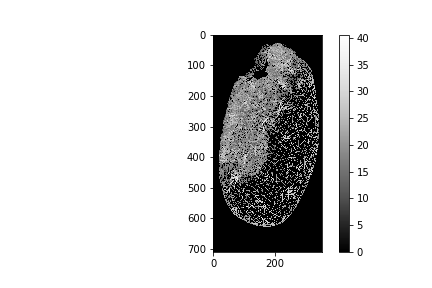
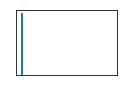

In [8]:
mesh = cle.draw_distance_mesh_between_touching_labels(expanded_labels)
mesh